In [2]:
# Multiple regression 1
setwd('C:/Users/15U560/Desktop/week9-1')

In [3]:
car <- read.csv('autompg.csv')
str(car)

'data.frame':	398 obs. of  9 variables:
 $ mpg    : num  18 15 18 16 17 15 14 14 14 15 ...
 $ cyl    : int  8 8 8 8 8 8 8 8 8 8 ...
 $ disp   : num  307 350 318 304 302 429 454 440 455 390 ...
 $ hp     : int  17 35 29 29 24 42 47 46 48 40 ...
 $ wt     : int  3504 3693 3436 3433 3449 4341 4354 4312 4425 3850 ...
 $ accler : num  12 11.5 11 12 10.5 10 9 8.5 10 8.5 ...
 $ year   : int  70 70 70 70 70 70 70 70 70 70 ...
 $ origin : int  1 1 1 1 1 1 1 1 1 1 ...
 $ carname: Factor w/ 305 levels "amc ambassador brougham",..: 50 37 232 15 162 142 55 224 242 2 ...


In [4]:
r1 <- lm(mpg ~ disp+hp+wt+accler, car)
summary(r1)
# R square 값이 0.7006


Call:
lm(formula = mpg ~ disp + hp + wt + accler, data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.8331  -2.8735  -0.3164   2.4449  16.2079 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 40.8838025  1.9966258  20.476  < 2e-16 ***
disp        -0.0106291  0.0065254  -1.629   0.1041    
hp           0.0047774  0.0082597   0.578   0.5633    
wt          -0.0061405  0.0007449  -8.243 2.54e-15 ***
accler       0.1722165  0.0976340   1.764   0.0785 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.298 on 393 degrees of freedom
Multiple R-squared:  0.7006,	Adjusted R-squared:  0.6976 
F-statistic:   230 on 4 and 393 DF,  p-value: < 2.2e-16


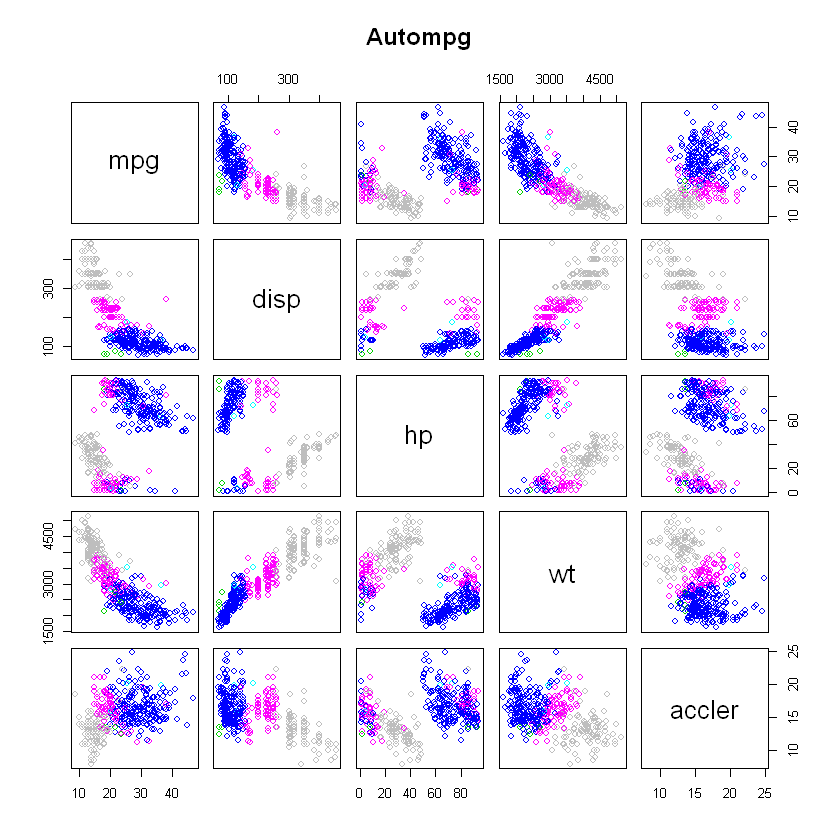

In [5]:
var1 =c('mpg', 'disp', 'hp', 'wt', 'accler')
pairs(car[var1], main= 'Autompg', cex=1, col=as.integer(car$cyl))
#mpg 와 hp의 분포를 보면 hp 50을 기준으로 음의 상관관계를 띄지만 회귀계수가 양이 나왔으므로 주의해서 봐야함

In [9]:
# Multiple regression 2
step(r1, direction='both')
# AIC는 작을수록 좋은것! 
# 최종모형은 mpg ~ disp + wt + accler

Start:  AIC=1165.67
mpg ~ disp + hp + wt + accler

         Df Sum of Sq    RSS    AIC
- hp      1      6.18 7266.2 1164.0
<none>                7260.0 1165.7
- disp    1     49.01 7309.1 1166.3
- accler  1     57.48 7317.5 1166.8
- wt      1   1255.16 8515.2 1227.1

Step:  AIC=1164.01
mpg ~ disp + wt + accler

         Df Sum of Sq    RSS    AIC
<none>                7266.2 1164.0
- disp    1     51.76 7318.0 1164.8
- accler  1     58.62 7324.8 1165.2
+ hp      1      6.18 7260.0 1165.7
- wt      1   1291.30 8557.5 1227.1



Call:
lm(formula = mpg ~ disp + wt + accler, data = car)

Coefficients:
(Intercept)         disp           wt       accler  
  41.299076    -0.010895    -0.006189     0.173851  


In [34]:
r2 <- lm(mpg ~ disp + wt + accler, car)
summary(r2)


Call:
lm(formula = mpg ~ disp + wt + accler, data = car)

Residuals:
     Min       1Q   Median       3Q      Max 
-11.7382  -2.8112  -0.3607   2.5231  16.1845 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) 41.2990756  1.8614975  22.186  < 2e-16 ***
disp        -0.0108953  0.0065036  -1.675   0.0947 .  
wt          -0.0061889  0.0007396  -8.368 1.03e-15 ***
accler       0.1738507  0.0975107   1.783   0.0754 .  
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 4.294 on 394 degrees of freedom
Multiple R-squared:  0.7004,	Adjusted R-squared:  0.6981 
F-statistic:   307 on 3 and 394 DF,  p-value: < 2.2e-16


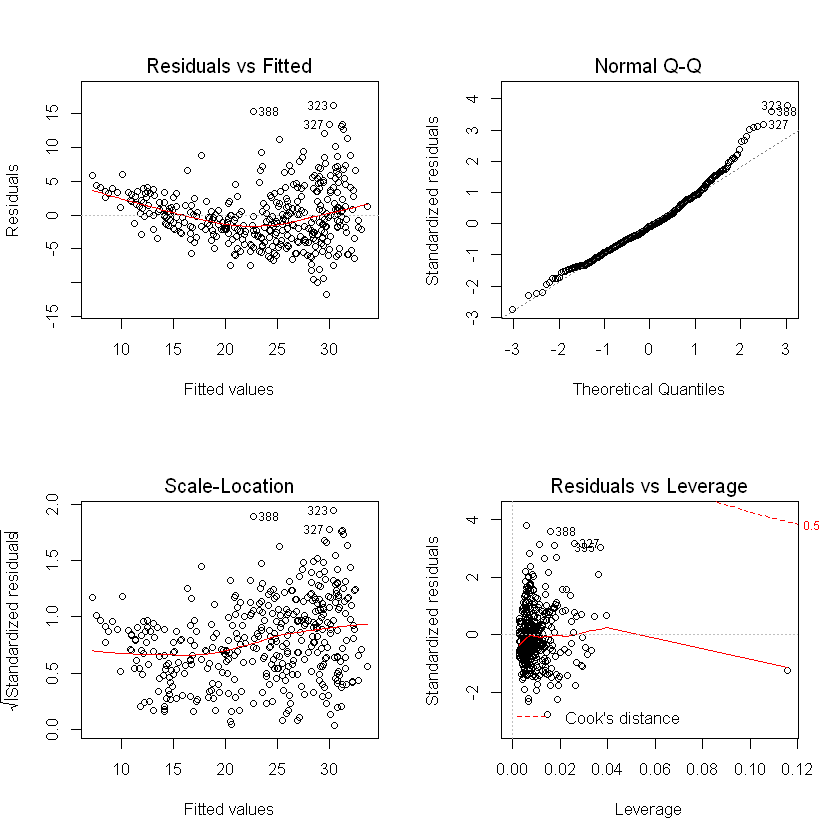

In [43]:
op = par(no.readonly = TRUE)
# 현재 상태를 op에 저장한다.
layout(matrix(c(1,2,3,4), 2, 2, byrow = TRUE))
plot(r2)
# Q-Q 그림에서 정규성을 만족한다고 볼 수 있다.

,disp,hp,wt,accler
disp,1.0000000,-0.4785123,0.9328241,-0.5436841
hp,-0.4785123,1.0000000,-0.4807430,0.2566567
wt,0.9328241,-0.4807430,1.0000000,-0.4174573
accler,-0.5436841,0.2566567,-0.4174573,1.0000000


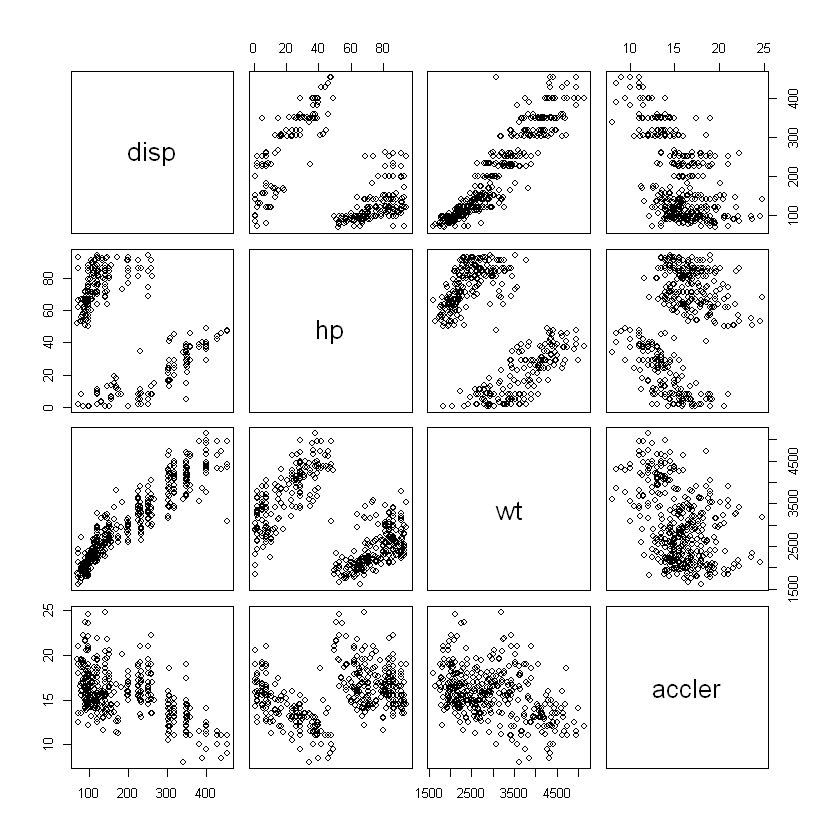

In [46]:
# 다중공선성(Multicollinearity)
var2 <- c('disp', 'hp', 'wt', 'accler')
cor(car[var2])
# disp와 wt의 상관성이 높다는 것을 알 수 있다. 하지만 상관성이 높다고 다중공선성이 있다고 판단 할 수 없다.
pairs(car[var2])

In [47]:
# vif > 10 이면 다중공선성 고려
# 예측력에 큰 문제는 없지만 회귀계수의 분산이 높아져 모형자체의 안정성이 떨어짐
# 다중공선성 해결방법
# 변수 선택 과정에서 상관계수가 높은 두 변수 중 하나만을 선택
# 더 많은 데이터 수집
# 능형회귀(ridge regression), 주성분회귀(principle components regression)

In [56]:
install.packages('car')
library(car)
vif(lm(mpg ~ disp + hp + wt + accler, car))

Warning message:
"package 'car' is in use and will not be installed"

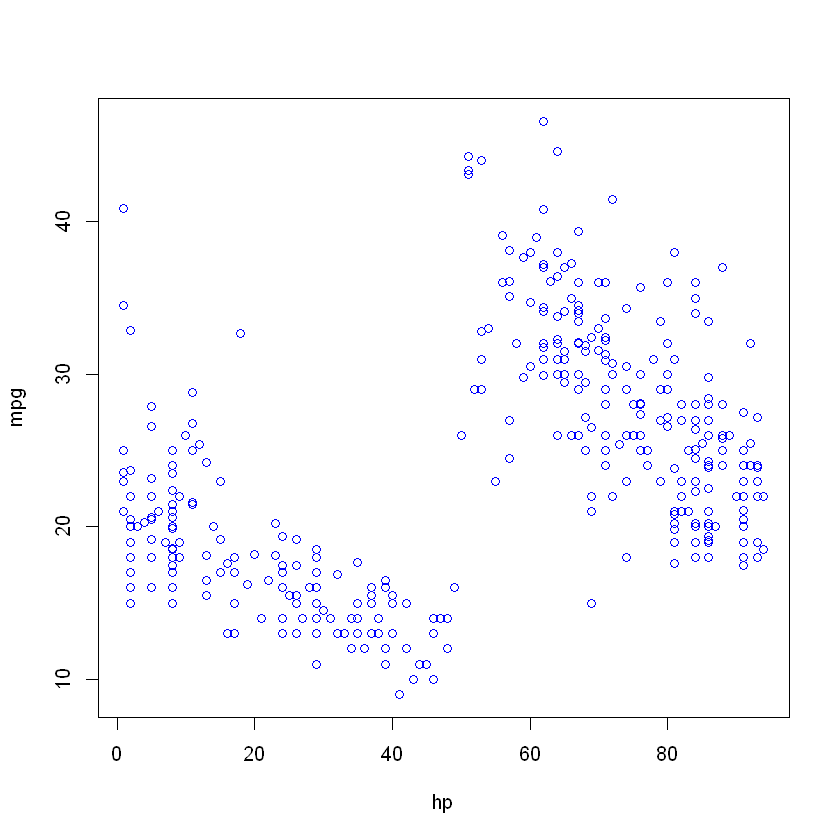

In [61]:
plot(mpg ~ hp, data = car, col='blue')

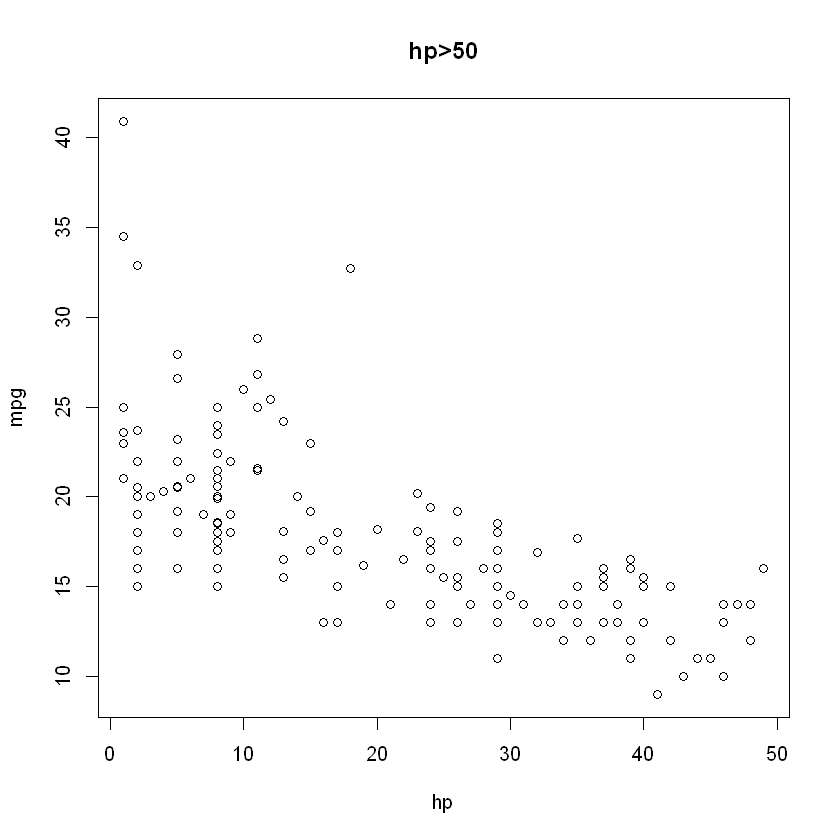

In [64]:
# 두 분류로 나눠서 분석하길 바람
a1 = subset(car, hp<50)
plot(mpg ~ hp, a1, main = 'hp>50' )

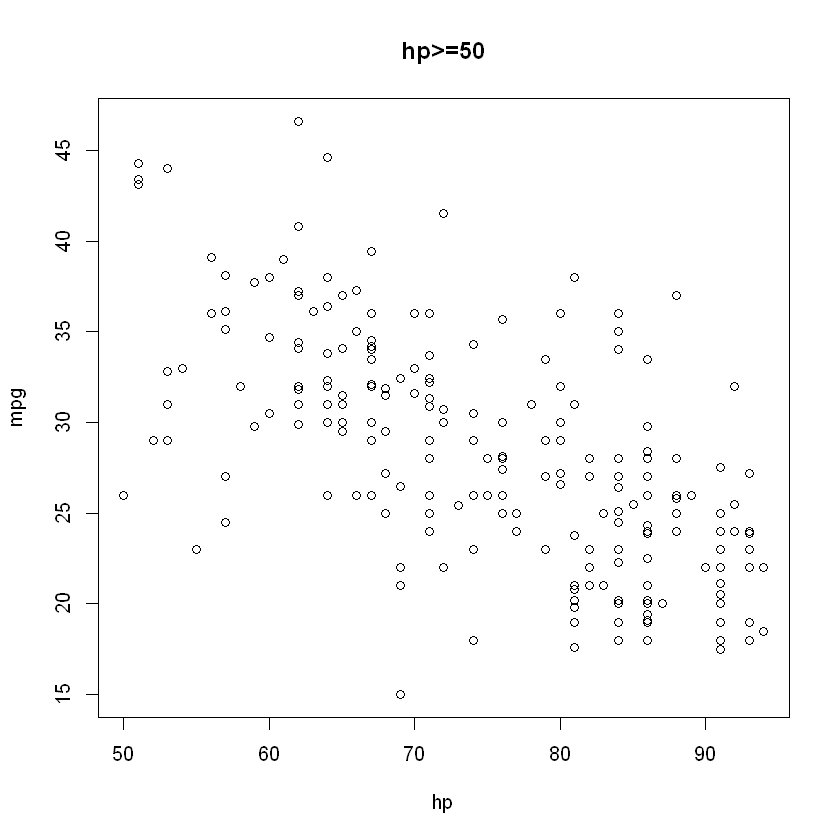

In [65]:
a2 = subset(car, hp>=50)
plot(mpg ~ hp, a2, main = 'hp>=50')